<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# GaussianNB with MaxAbsScaler and QuantileTransformer

This Code template is for the Classification tasks using GaussianNB based on the Gaussian Naive Bayes algorithm that follows Gaussian normal distribution and supports continuous data; feature scaling is done via MaxAbsScaler while feature transformation via Quantile Transformer

### Required Packages

In [ ]:
!pip install imblearn

In [ ]:
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler,QuantileTransformer
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,plot_confusion_matrix 
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [3]:
#filepath
file_path= " "

List of features which are  required for model training .

In [4]:
#x_values
features=[ ]

Target feature for prediction.

In [5]:
#y_value
target=' '

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [7]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [8]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [9]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Encoded Target: ['DrugY' 'drugA' 'drugB' 'drugC' 'drugX'] to [0, 1, 2, 3, 4]


,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

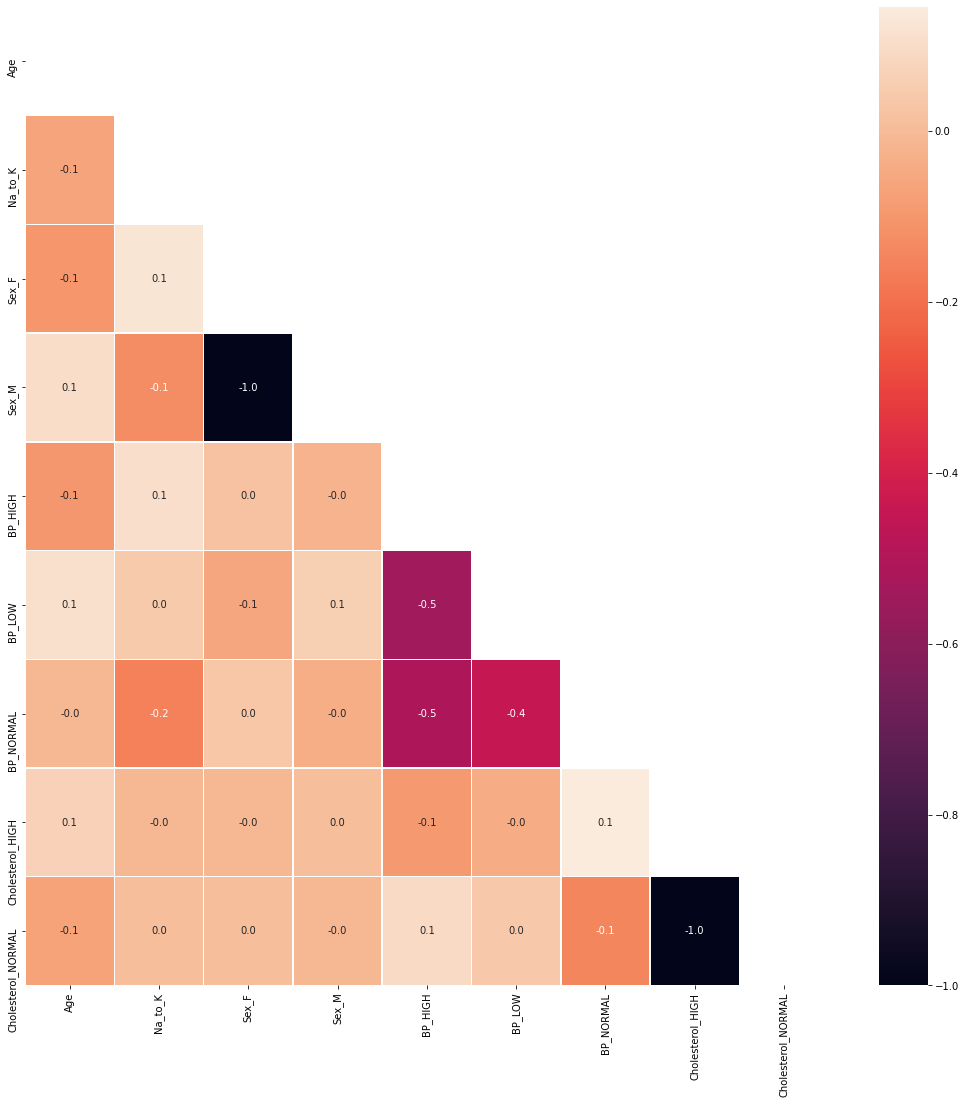

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

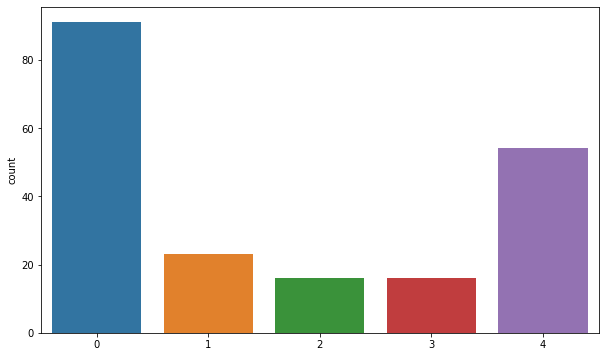

In [11]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#### Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library. 

In [13]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

### Model
Gaussian NB is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. An approach to creating a simple model is to assume that the data is described by a Gaussian distribution with no co-variance between features. 


#### Model Tuning Parameters

    1. priors : array-like of shape (n_classes,)
> Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

    2. var_smoothing : float, default=1e-9
> Portion of the largest variance of all features that is added to variances for calculation stability.

#### Feature Scaling
MaxAbsScaler scales each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity

#### Feature Transformation
Apply a QuantileTransform featurewise to make data more Gaussian-like.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

Transform features using quantiles information.

In [14]:
# Build Model here
model=make_pipeline(MaxAbsScaler(),QuantileTransformer(),GaussianNB())
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('maxabsscaler', MaxAbsScaler(copy=True)),
                ('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.


In [15]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 42.50 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

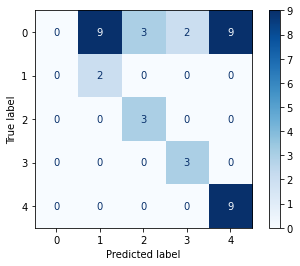

In [16]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [17]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.18      1.00      0.31         2
           2       0.50      1.00      0.67         3
           3       0.60      1.00      0.75         3
           4       0.50      1.00      0.67         9

    accuracy                           0.42        40
   macro avg       0.36      0.80      0.48        40
weighted avg       0.20      0.42      0.27        40



 #### Creator: Ageer Harikrishna, Github: [Profile](https://github.com/ageerHarikrishna)